# Optimization

In [1]:
import modules
from modules import Aqua_Obj
import optimization
import copy
from utilities import *
import numpy as np
import importlib
importlib.reload(modules)
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import warnings
warnings.filterwarnings('ignore')

max_iter = 2000    
    
# fill default parameters
all_vars = ['x_wec','x_type_wec','x_pen', 'x_disc_pen', 'p_pen','x_env','p_wec','p_fish_salmon', 'x_es', 'p_es','wave_data']

wec_types = ['point_absorber_RM3'] #,'attenuator','terminator','point_absorber_RM3']

# design variables
x_name = ['pos_env']
x_list, x0_val, x_unit, x_bnds, x_label = optimization.default_value(x_name)
x0 = []
for i in range(len(x_list)):
    x0.append(x0_val[x_list[i]])

# parameters
param_name = ['x_type_wec', 'x_wec', 'x_pen','x_disc_pen', 'x_es']
param_val = {}
# WEC and Pen Parameters are defined by optimal results obtained by running "run_sim_wec" 
param_val['capture_width']=  9        #[m]
param_val['pen_diameter']=   10.0     #[m]
param_val['pen_height']=     3.00     #[m]
param_val['spacing']=        150      #[m]
param_val['stock_density']=  30       #[kg/m^3]
param_val['pen_depth']=      10.0     #[m]
param_val['es_size']=        370.450  #[kWh]
param_val['num_pens']=       11       #[-]

#optimization
best_idx = 0
res={}
res_best={}
init_flag = 1

for i in range(len(wec_types)):
    param_val['wec_type'] = wec_types[i]
    p_list, p, p_unit, p_bnds, p_label = optimization.argument_fun(x_name, param_name, param_val, all_vars)
    
    init_result(x0, x_name, p)
    
    res, op_obj = optimization.run_optimization(x_name, x0, param_name, param_val, all_vars, max_iter)
    

    if init_flag:
        res_best = copy.copy(res)
        p_best = p
    elif (res.success) and (res.fun < res_best.fun):
        res_best = copy.copy(res)
        p_best = p
    
    init_flag = 0


optimize_result(x_name, x_list, x_unit, res_best, p_best)

Initial objective function terms:
   cost_per_yield      8.038 [$/kg]
   price          531227.876 [$]
   fish_yield      66091.255 [kg]
----------------------------------------
Initial WEC rated power:
   P_rated          30.008 [kW]
----------------------------------------
Initial price break down:
   wec price        39316.512 [$]
   pen price       259181.394 [$]
   fish feed price 132338.020 [$]
   energy st price 100391.950 [$]
----------------------------------------
Initial constraints:
   P_gen_cons              370.450 [kWh]
   fish_yield_cons      452862.977 [kg]
   env_Umin_cons             0.028 [m/s]
   env_Umax_cons             1.962 [m/s]
   env_tempmin_cons          8.766 [C]
   env_tempmax_cons         17.234 [C]
   env_salinitymin_cons      1.834 [PSU]
   env_salinitymax_cons      3.166 [PSU]
   env_O2_min_cons           4.922 [mg/l]
----------------------------------------
Initial carrying capacity:
   TPF_O2               2308570.783 [kg fish/year]
   Carrying Capa

# Plot fish growth and fish oxygen demand

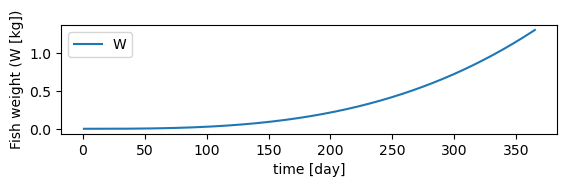

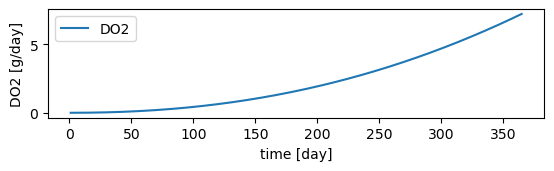

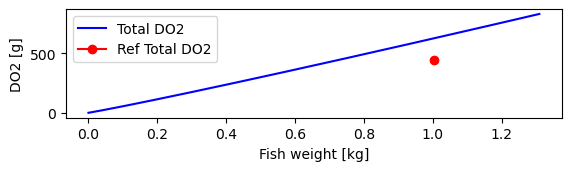

DO2 for 1kg fish 591.7028507712805
DO2 for 2kg fish 0
DO2 for 3kg fish 0
DO2 for 4kg fish 0
fish weight after 365 days 1309.183212127668


In [2]:
aqua_opt_obj = Aqua_Obj(res_best.x, x_name, p_best) 
aqua_opt_obj.plot_variable()

# Plot objective function and constraints

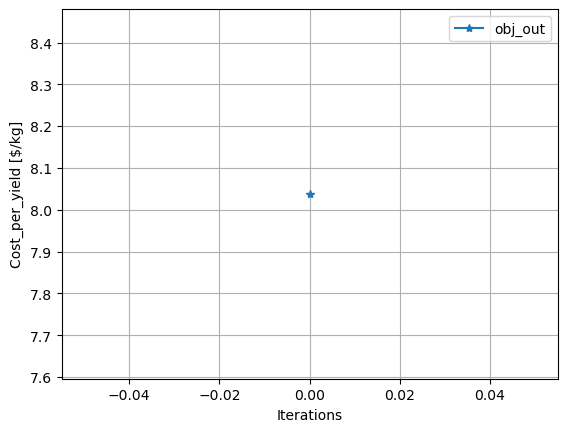

In [3]:
fig, ax = plt.subplots(1,1)
ax.plot(op_obj.f, label='obj_out', marker='*')
ax.set(xlabel='Iterations', ylabel='Cost_per_yield [$/kg]')
ax.legend()
ax.grid(True)
plt.show()

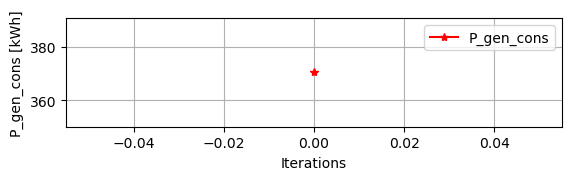

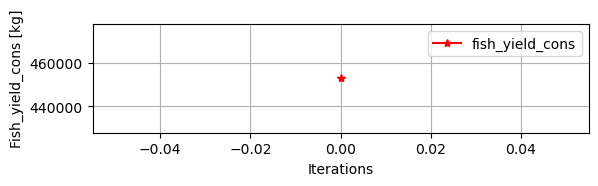

In [4]:
ax1 = plt.subplot(3,1,1)
ax1.plot(op_obj.ineq[:, 0], 'r', label='P_gen_cons', marker='*')
ax1.set(xlabel='Iterations', ylabel='P_gen_cons [kWh]');
ax1.legend()
ax1.grid(True)
plt.show()

ax2 = plt.subplot(3,1,2)
ax2.plot(op_obj.ineq[:, 1], 'r', label='fish_yield_cons', marker='*')
ax2.set(xlabel='Iterations', ylabel='Fish_yield_cons [kg]');
ax2.legend()
ax2.grid(True)
plt.show()
